## Library Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

## Data Import

In [3]:
df = pd.read_csv('final_merged.csv', index_col=0)

## Data Cleaning

Dropping all the rows that have NaN

In [4]:
df.dropna(inplace=True)

# Data Manipulation

The dataset is grouped on customer_unique_id, and, for each customer, is made:
- The sum of order_item_sequence_id
- The counting of product_category_name
- The sum of price
- The sum of transaction_value
- The sum of shipping_cost
- The mean of review_score
- The computation of the last value in ts_order_purchase
- The counting of order_id

In [5]:
gb_products_bought = df.groupby(['customer_unique_id']).agg({'order_item_sequence_id':'sum','product_category_name':'count','price':'sum','transaction_value':'sum','shipping_cost':'sum', 'review_score':'mean', 'ts_order_purchase':'max', 'order_id':'count'}).reset_index()
alldata = gb_products_bought.sort_values(by=['product_category_name'], ascending=False)

In [6]:
alldata.head(2)

,customer_unique_id,order_item_sequence_id,product_category_name,price,transaction_value,shipping_cost,review_score,ts_order_purchase,order_id
54839,9a736b248f67d166d2fbb006bcb877c3,138,75,77580,12179.0,140598,5.0,2018-08-08 20:26:00,75
39723,6fbc7cdadbb522125f4b27ae9dee4060,57,38,303962,38646.0,86944,5.0,2018-09-23 14:56:00,38


Changing the name of the variable 'product_category_name' in 'ammount_prod_categories', since it takes into account the number of different categories purchased by each customer

In [7]:
alldata = alldata.rename(columns={"product_category_name": "ammount_prod_categories"})

In [8]:
alldata['ts_order_purchase'] = pd.to_datetime(alldata['ts_order_purchase'])

### Recency
Taking the date of the last purchase made and compute, for each customer, the difference in days between the overall last purchase and his last purchase

In [9]:
alldata['today'] = alldata['ts_order_purchase'].max()
alldata['recency'] = alldata['today'] - alldata['ts_order_purchase']

In [10]:
alldata['recency'] = alldata['recency'].dt.days

In [11]:
alldata.head(2)

,customer_unique_id,order_item_sequence_id,ammount_prod_categories,price,transaction_value,shipping_cost,review_score,ts_order_purchase,order_id,today,recency
54839,9a736b248f67d166d2fbb006bcb877c3,138,75,77580,12179.0,140598,5.0,2018-08-08 20:26:00,75,2019-08-29 15:00:00,385
39723,6fbc7cdadbb522125f4b27ae9dee4060,57,38,303962,38646.0,86944,5.0,2018-09-23 14:56:00,38,2019-08-29 15:00:00,340


In [12]:
alldata.drop(['ts_order_purchase','today'], inplace= True, axis=1)

### Frequency
Changing the name of the column order_id in frequency, since it has the number of orders made by each customer  

In [13]:
alldata = alldata.rename(columns={"order_id": "frequency"})

In [14]:
alldata.to_csv('rfm.csv')

### Distribution of recency

c:\Users\cosim\anaconda3\envs\ntt\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


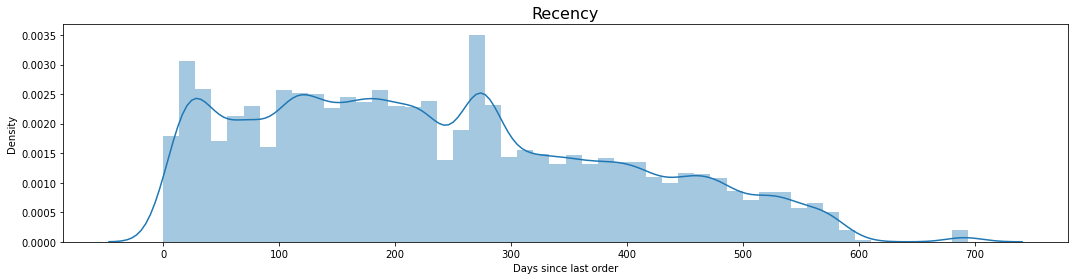

In [15]:
plt.figure(figsize=(18, 4))
sns.distplot(alldata['recency'])

plt.xlabel('Days since last order')
plt.title('Recency',fontsize=16);
plt.show()

### Distribution of frequency

c:\Users\cosim\anaconda3\envs\ntt\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


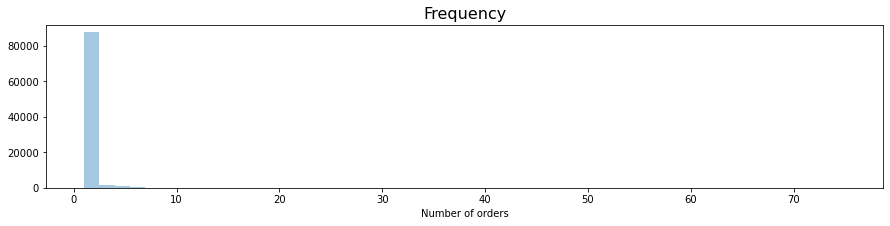

1     77259
2     10073
3      1836
4       853
5       292
6       259
7        67
8        38
12       22
9        20
10       17
11       17
14        8
13        5
15        5
24        4
20        3
21        3
16        2
38        1
18        1
19        1
22        1
26        1
35        1
75        1
Name: frequency, dtype: int64


In [16]:

plt.figure(figsize=(15, 3))
sns.distplot(alldata['frequency'], kde=False);

plt.xlabel('Number of orders')
plt.title('Frequency',fontsize=16);
plt.show()
print(alldata['frequency'].value_counts())

### Distribution of monetary
Monetary is the ammount spent by each customer

c:\Users\cosim\anaconda3\envs\ntt\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


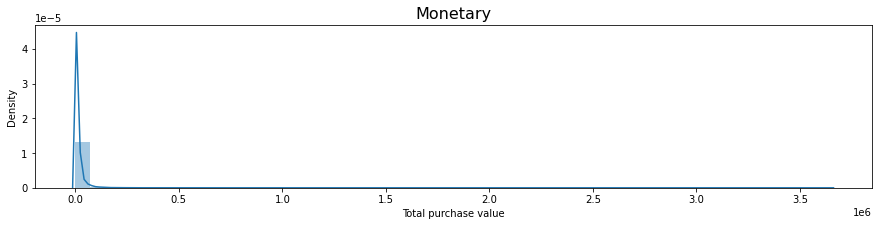

In [17]:
plt.figure(figsize=(15, 3))
sns.distplot(alldata['transaction_value']);

plt.xlabel('Total purchase value')
plt.title('Monetary', fontsize=16);
plt.show()

## Features distribution

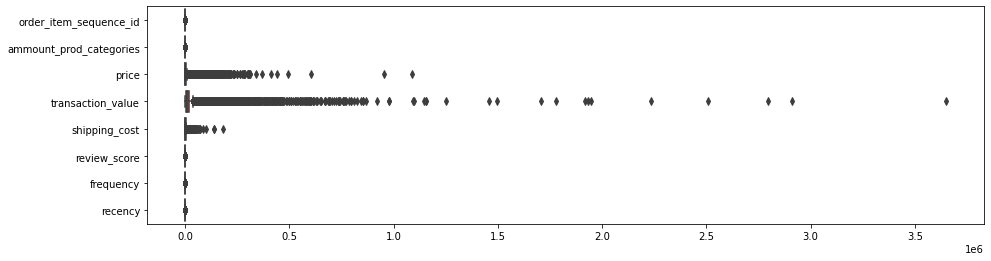

Index(['customer_unique_id', 'order_item_sequence_id',
       'ammount_prod_categories', 'price', 'transaction_value',
       'shipping_cost', 'review_score', 'frequency', 'recency'],
      dtype='object')


In [18]:
plt.figure(figsize = (15,4))
sns.boxplot(data = alldata, orient = "h")
plt.show()
print(alldata.columns)

Removing some outliers for a better visualization

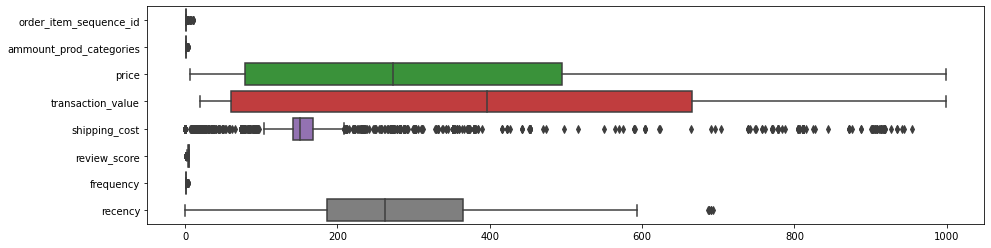

In [19]:
alldata2 = alldata[(alldata['transaction_value'] < 1000) & (alldata['price'] < 1000) & (alldata['shipping_cost'] < 1000)] # low payments
plt.figure(figsize = (15,4))
sns.boxplot(data = alldata2, orient = "h")
plt.show()

### WordCloud
Of the most purchased items

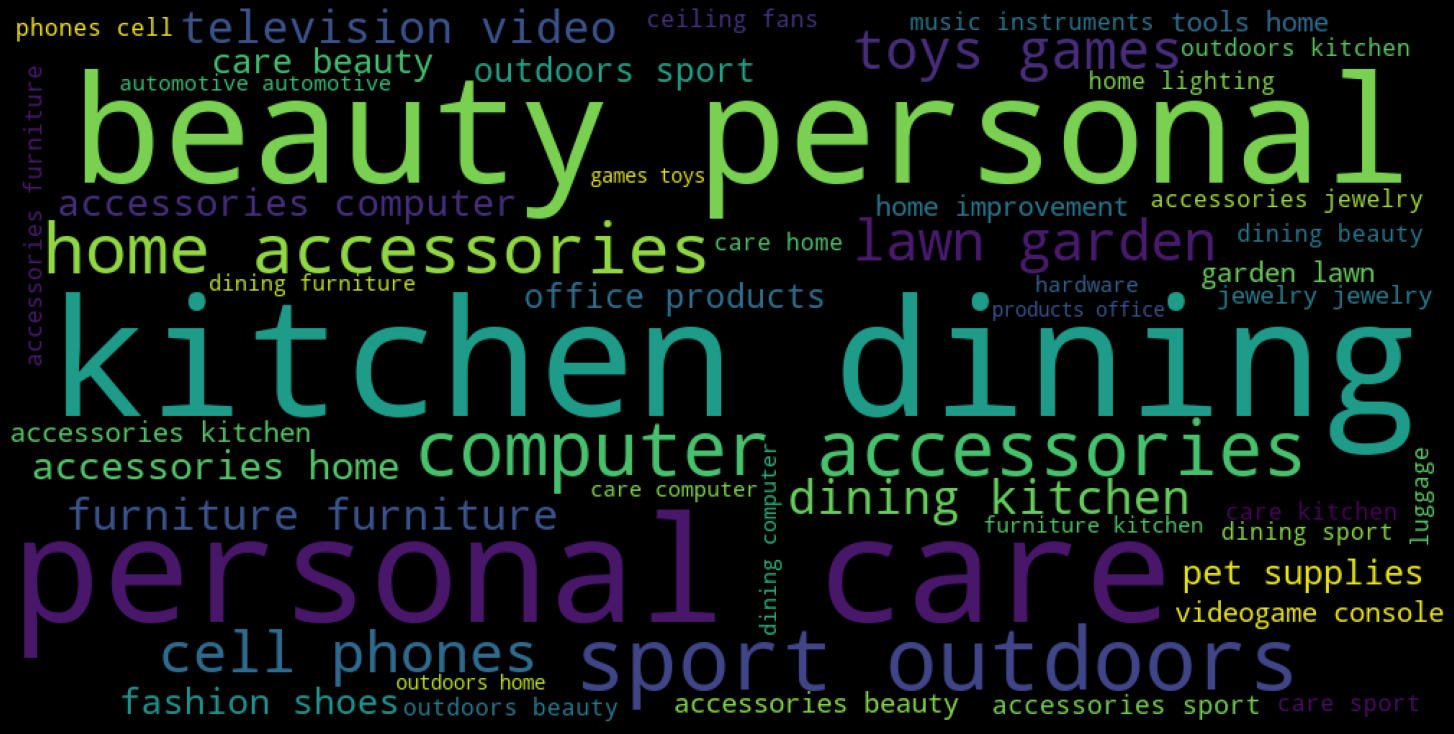

In [20]:
soup = ' '.join(df['product_category_name'])

wordcloud = WordCloud(width=1000, height=500,max_words=50)
wordcloud.generate(soup)
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


### Best 10 product categories for review score

In [21]:
rating_count = (df.groupby(by=['product_category_name'])['review_score'].mean().reset_index().rename(columns={'review_score':'review_count'})[['product_category_name','review_count']])

In [22]:
rating_count

,product_category_name,review_count
0,agriculture suppliers,4.313008
1,automotive,4.065554
2,bakeware,3.928571
3,beauty & personal care,4.098851
4,bedroom decor,4.462185
...,...,...
63,videogame console,4.055357
64,wall art,4.083333
65,watches,4.071429
66,wellness & relaxation,4.138889


In [23]:
product_rew = rating_count.sort_values(by=['review_count'], ascending=False)

best_noted_products = product_rew[:10]
best_noted_products = best_noted_products[['product_category_name','review_count']]
best_noted_products[:10]

,product_category_name,review_count
46,model hobby building,4.714286
16,diet sports nutrition,4.466667
4,bedroom decor,4.462185
67,woman's fashion,4.355556
0,agriculture suppliers,4.313008
38,kids fashion,4.285714
18,event & party supplies,4.266667
45,men's fashion,4.264706
61,underwear,4.215827
7,camera & photo,4.180556


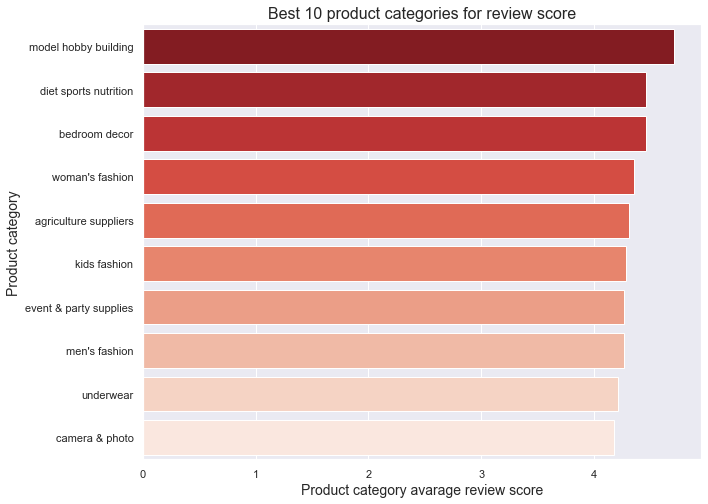

In [24]:
sns.set_context("talk")
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,8)})
prodnote_hist = sns.barplot( y=best_noted_products["product_category_name"], x=best_noted_products["review_count"],palette = "Reds_r");
plt.title('Best 10 product categories for review score', fontsize = 16)
plt.xlabel('Product category avarage review score', fontsize = 14)
plt.ylabel('Product category', fontsize = 14)
plt.show()

### 10 more ordered product categories

In [25]:
prodcat = df.groupby(['product_category_name']).sum().reset_index() 
prodcat = prodcat[prodcat['product_category_name'] != 'None']
prodcat = prodcat.sort_values(by=['order_item_sequence_id'], ascending=False)

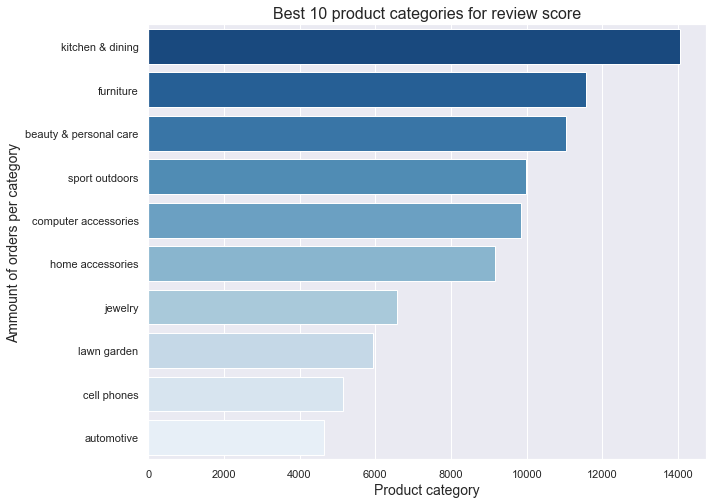

In [26]:
prodcat0 = prodcat[:10]

sns.set_context("talk")
sns.set_style("white")
sns.set(rc={'figure.figsize':(10,8)})
catorderhist = sns.barplot( y=prodcat0["product_category_name"], x=prodcat0["order_item_sequence_id"] ,palette = 'Blues_r');
plt.title('Best 10 product categories for review score', fontsize = 16)
plt.xlabel('Product category', fontsize = 14)
plt.ylabel('Ammount of orders per category', fontsize = 14)
plt.show()

### Best 10 products for revenue

In [27]:
valcat = prodcat.sort_values(by=['price'], ascending=False)
valcat1 = valcat[:10]

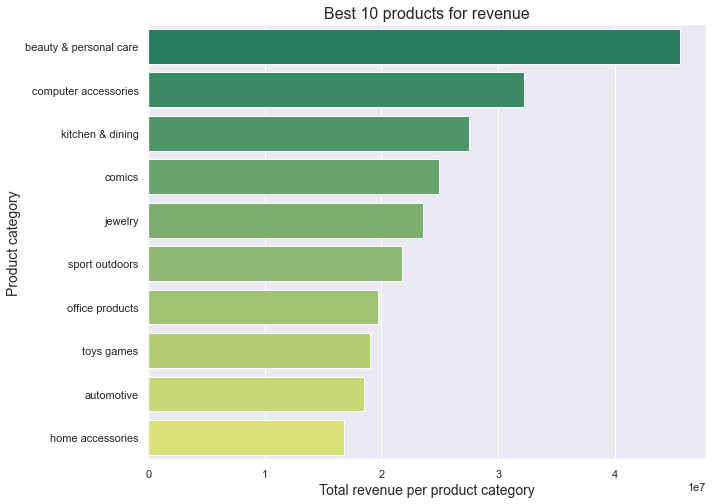

In [28]:
cat_revenue_hist = sns.barplot( y=valcat1["product_category_name"], x=valcat1["price"], palette= 'summer' );
sns.set(rc={'figure.figsize':(10,10)})
plt.title('Best 10 products for revenue', fontsize=16)
plt.xlabel('Total revenue per product category', fontsize = 14)
plt.ylabel('Product category', fontsize = 14)
plt.show()

### Distribution of customers per region

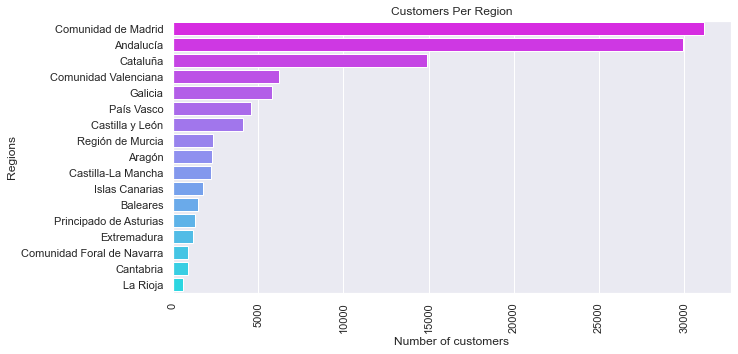

In [29]:
plt.figure(figsize=(10,5))
plt.title('Customers Per Region')
plt.ylabel('Regions')
plt.xlabel('Number of customers')
sns.barplot(y=df['customer_autonomous_community'].value_counts().index,x=df['customer_autonomous_community'].value_counts().values, palette = 'cool_r')
plt.xticks(rotation = 90)
plt.show()

# RFM Analysis

### Data Mnaipulation

Only 'customer_unique_id', 'frequency', 'recency' and 'transaction_value' are kept

In [30]:
df_RFM = alldata[['customer_unique_id','frequency','recency','transaction_value']]
print(df_RFM.shape)
df_RFM.head()

(90790, 4)


,customer_unique_id,frequency,recency,transaction_value
54839,9a736b248f67d166d2fbb006bcb877c3,75,385,12179.0
39723,6fbc7cdadbb522125f4b27ae9dee4060,38,340,38646.0
88623,f9ae226291893fda10af7965268fb7f6,35,535,94647.0
30816,569aa12b73b5f7edeaa6f2a01603e381,26,448,3253.0
77851,db1af3fd6b23ac3873ef02619d548f9c,24,418,61074.0


In [31]:
df_RFM = df_RFM.reset_index(drop=True)
df_RFM.head()

,customer_unique_id,frequency,recency,transaction_value
0,9a736b248f67d166d2fbb006bcb877c3,75,385,12179.0
1,6fbc7cdadbb522125f4b27ae9dee4060,38,340,38646.0
2,f9ae226291893fda10af7965268fb7f6,35,535,94647.0
3,569aa12b73b5f7edeaa6f2a01603e381,26,448,3253.0
4,db1af3fd6b23ac3873ef02619d548f9c,24,418,61074.0


### Quantiles

Defining 5 partition of each feature between recency, frequency and monetary (transaction_value)

If a customer has a value of those features, for istance, in the first quantile, he will get a 1 in a new column (for istance R, for recency), if the value is in the second quantile, he will get a 2 and so on 

In [32]:
quintiles = df_RFM[['recency', 'frequency', 'transaction_value']].quantile([.2, .4, .6, .8]).to_dict()

In [33]:
def r_score(x):
    if x <= quintiles['recency'][.2]:
        return 5
    elif x <= quintiles['recency'][.4]:
        return 4
    elif x <= quintiles['recency'][.6]:
        return 3
    elif x <= quintiles['recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    

In [34]:
df_RFM['R'] = df_RFM['recency'].apply(lambda x: r_score(x))
df_RFM['F'] = df_RFM['frequency'].apply(lambda x: fm_score(x, 'frequency'))
df_RFM['M'] = df_RFM['transaction_value'].apply(lambda x: fm_score(x, 'transaction_value'))
df_RFM['RFM Score'] = df_RFM['R'].map(str) + df_RFM['F'].map(str) + df_RFM['M'].map(str)

## Customer segmentation

Definining different classes of customer and assign each real customer to one of those classes, based on his value of recency and frequency

- True Friends:

customers who have made an high ammount of orders and the last one recently.

- Barnacles:

customers who have made a low/medium ammount of orders and the last one recently.

- Strangers:

customers with low recency and frequency, people that made a small ammount of orders long time ago.

- Old friend:

customers who used to made a lot of orders but stopped buying a long time ago.

- Promising:

customers who have made a medium/high ammount of orders and the last one recently.

- New customers:

customers who made few orders but recently.

In [35]:
segm1_map = {
    r'[1-2]1': 'Strangers',
    r'[1-2][4-5]': 'Old firends',
    r'5[1-2]': 'New customers',
    r'[3-4]5': 'Promising',
    r'[4-5]5': 'True friends',
    r'[3-4][1-3]': 'Barnacles'
}

df_RFM['Segment1'] = df_RFM['R'].map(str) + df_RFM['F'].map(str)
df_RFM['Segment1'] = df_RFM['Segment1'].replace(segm1_map, regex=True)

In [36]:
alldata['R'] = alldata['recency'].apply(lambda x: r_score(x))
alldata['F'] = alldata['frequency'].apply(lambda x: fm_score(x, 'frequency'))
alldata['M'] = alldata['transaction_value'].apply(lambda x: fm_score(x, 'transaction_value'))
alldata['RFM Score'] = alldata['R'].map(str) + alldata['F'].map(str) + alldata['M'].map(str)
alldata['Segment1'] = alldata['R'].map(str) + alldata['F'].map(str)
alldata['Segment1'] = alldata['Segment1'].replace(segm1_map, regex=True)

In [37]:
alldata.to_csv('rfm_seg.csv')

### Plot of customer segmentation, for all value of monetary

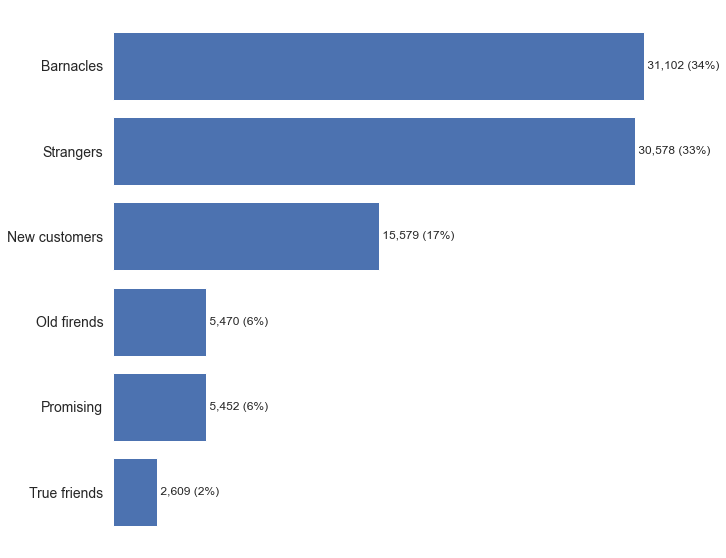

In [38]:
segment1s_counts = df_RFM['Segment1'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segment1s_counts)),
              segment1s_counts,
              color='b')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segment1s_counts)))
ax.set_yticklabels(segment1s_counts.index,  fontsize = 14)

for i, bar in enumerate(bars):
        value = bar.get_width()
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                ' {:,} ({:}%)'.format(int(value),
                                   int(value*100/segment1s_counts.sum())),
                va='center',
                ha='left'
               )
sns.set(rc={'figure.figsize':(5,10)})
plt.show()

## Plot of customer segmentation for low value of monetary

C:\Users\cosim\AppData\Local\Temp\ipykernel_7956\3248254238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_spenders['Segment_big'] = low_spenders['R'].map(str) + low_spenders['F'].map(str)
C:\Users\cosim\AppData\Local\Temp\ipykernel_7956\3248254238.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_spenders['Segment_big'] = low_spenders['Segment_big'].replace(segm1_map, regex=True)


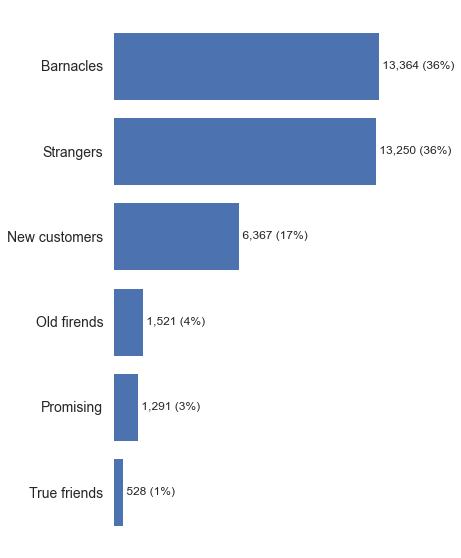

In [39]:
low_spenders = df_RFM[df_RFM['M']<=2]
low_spenders['Segment_big'] = low_spenders['R'].map(str) + low_spenders['F'].map(str)
low_spenders['Segment_big'] = low_spenders['Segment_big'].replace(segm1_map, regex=True)

segment1s_counts = low_spenders['Segment_big'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segment1s_counts)),
              segment1s_counts,
              color='b')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segment1s_counts)))
ax.set_yticklabels(segment1s_counts.index,  fontsize = 14)

for i, bar in enumerate(bars):
        value = bar.get_width()
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                ' {:,} ({:}%)'.format(int(value),
                                   int(value*100/segment1s_counts.sum())),
                va='center',
                ha='left'
               )
sns.set(rc={'figure.figsize':(5,10)})
plt.show()

## Plot of customer segmentation for average value of monetary

C:\Users\cosim\AppData\Local\Temp\ipykernel_7956\3923109932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_spenders['Segment_big'] = avg_spenders['R'].map(str) + avg_spenders['F'].map(str)
C:\Users\cosim\AppData\Local\Temp\ipykernel_7956\3923109932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_spenders['Segment_big'] = avg_spenders['Segment_big'].replace(segm1_map, regex=True)


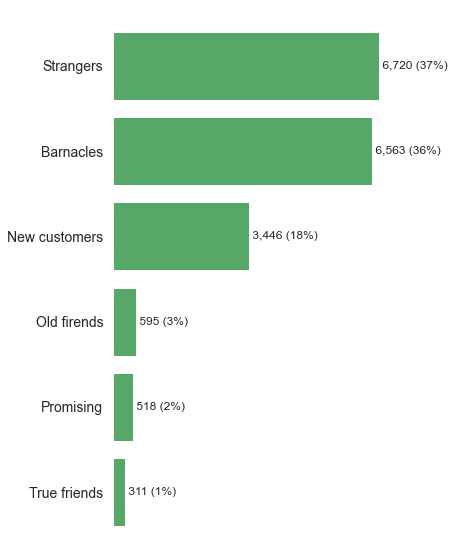

In [40]:
avg_spenders = df_RFM[df_RFM['M']==3]
avg_spenders['Segment_big'] = avg_spenders['R'].map(str) + avg_spenders['F'].map(str)
avg_spenders['Segment_big'] = avg_spenders['Segment_big'].replace(segm1_map, regex=True)

segment1s_counts = avg_spenders['Segment_big'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segment1s_counts)),
              segment1s_counts,
              color='g')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segment1s_counts)))
ax.set_yticklabels(segment1s_counts.index,  fontsize = 14)

for i, bar in enumerate(bars):
        value = bar.get_width()
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                ' {:,} ({:}%)'.format(int(value),
                                   int(value*100/segment1s_counts.sum())),
                va='center',
                ha='left'
               )
sns.set(rc={'figure.figsize':(5,10)})
plt.show()

## Plot of customer segmentation for high value of monetary

36316


C:\Users\cosim\AppData\Local\Temp\ipykernel_7956\3806455741.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_spenders['Segment_big'] = high_spenders['R'].map(str) + high_spenders['F'].map(str)
C:\Users\cosim\AppData\Local\Temp\ipykernel_7956\3806455741.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_spenders['Segment_big'] = high_spenders['Segment_big'].replace(segm1_map, regex=True)


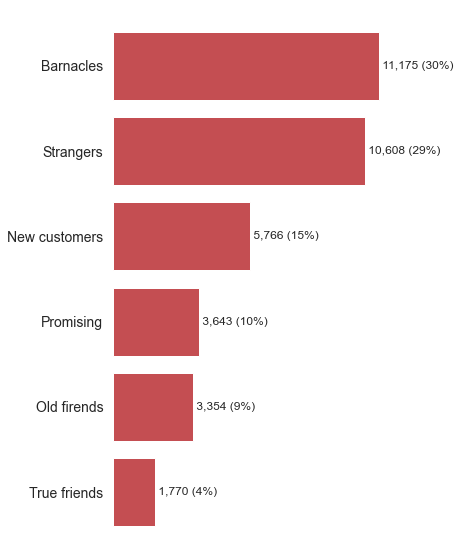

In [41]:
high_spenders = df_RFM[df_RFM['M']>=4]
print(len(high_spenders))

high_spenders['Segment_big'] = high_spenders['R'].map(str) + high_spenders['F'].map(str)
high_spenders['Segment_big'] = high_spenders['Segment_big'].replace(segm1_map, regex=True)

segment1s_counts = high_spenders['Segment_big'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segment1s_counts)),
              segment1s_counts,
              color='r')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segment1s_counts)))
ax.set_yticklabels(segment1s_counts.index,  fontsize = 14)

for i, bar in enumerate(bars):
        value = bar.get_width()
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                ' {:,} ({:}%)'.format(int(value),
                                   int(value*100/segment1s_counts.sum())),
                va='center',
                ha='left'
               )
sns.set(rc={'figure.figsize':(5,10)})
plt.show()